<a href="https://colab.research.google.com/github/SoramKim/Machine-Learning-Study/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data01_iris.csv')

# Visualization

In [ ]:
df['Species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: Species, dtype: object

In [ ]:
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [ ]:
df.describe(include='all')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f225b12f3d0>,
      dtype=object)

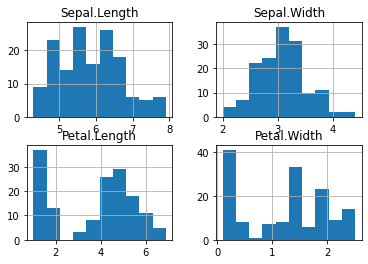

In [ ]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f225aac2050>]],
      dtype=object)

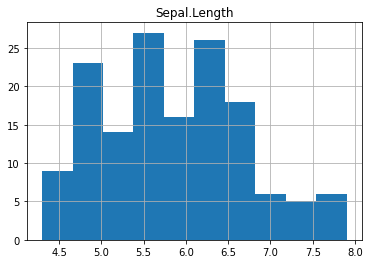

In [ ]:
df.hist('Sepal.Length')

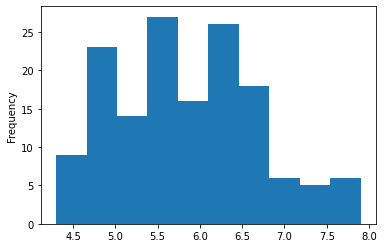

In [ ]:
df['Sepal.Length'].plot.hist()

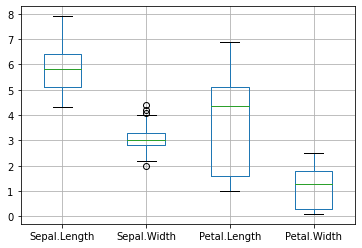

In [ ]:
df.boxplot()

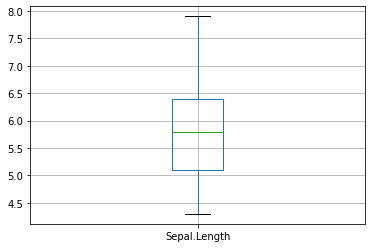

In [ ]:
df.boxplot('Sepal.Length')

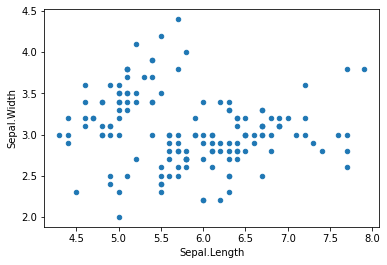

In [ ]:
df.plot.scatter('Sepal.Length','Sepal.Width')

In [ ]:
SpeciesCode = df['Species'].astype('category').cat.codes # 0,1,2로 class

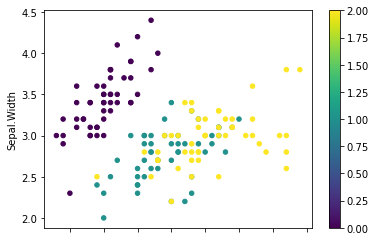

In [ ]:
df.plot.scatter('Sepal.Length','Sepal.Width',c=SpeciesCode,colormap='viridis')

# Outlier Detection




KNN

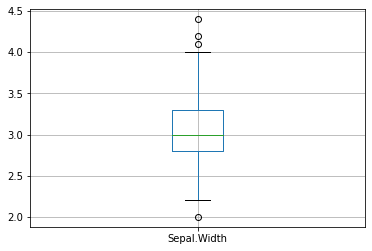

In [ ]:
# univariate outlier detection
# outlier check for each variable
df.boxplot('Sepal.Width')

In [ ]:
m=df['Sepal.Width'].describe()
m

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: Sepal.Width, dtype: float64

In [ ]:
ub=m['75%']+1.5*(m['75%']-m['25%'])
ub
lb=m['25%']-1.5*(m['75%']-m['25%'])
lb

2.05

In [ ]:
# multivariate outlier detection
x = df.iloc[:,:-1].values
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(x)

KMeans(n_clusters=3)

In [ ]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
center_matrix = km.cluster_centers_[km.labels_,:]

In [ ]:
dist = ((x-center_matrix)**2).sum(axis=1)

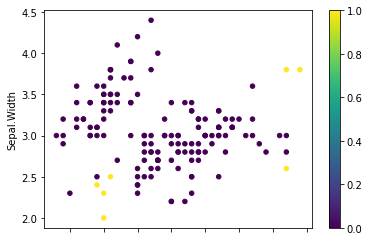

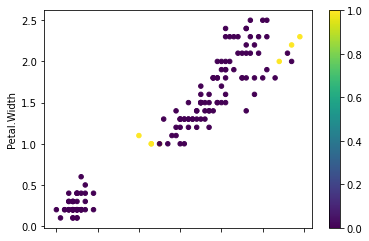

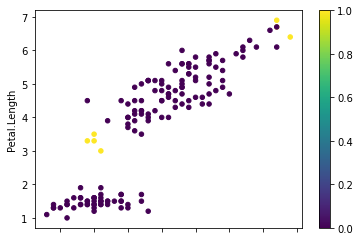

In [ ]:
np.sort(dist)
outlier_idx = dist>2.0

df.plot.scatter('Sepal.Length','Sepal.Width',c=outlier_idx,colormap='viridis')
df.plot.scatter('Petal.Length','Petal.Width',c=outlier_idx,colormap='viridis')
df.plot.scatter('Sepal.Length','Petal.Length',c=outlier_idx,colormap='viridis')




PCA

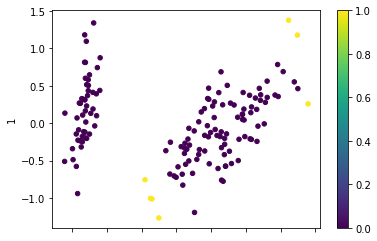

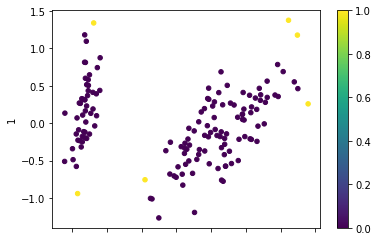

In [ ]:
# pca
from sklearn.decomposition import PCA
pca = PCA()
xtrans = pca.fit_transform(x)
df_trans = pd.DataFrame(xtrans)
df_trans.plot.scatter(0,1,c=outlier_idx,colormap='viridis')

# using sophisticated functions
from sklearn.neighbors import LocalOutlierFactor
f = LocalOutlierFactor()
detect = f.fit_predict(x)
outlier_idx2 = detect==-1
pd.crosstab(outlier_idx,outlier_idx2)
df_trans.plot.scatter(0,1,c=outlier_idx2,colormap='viridis')


using sophisticated functions

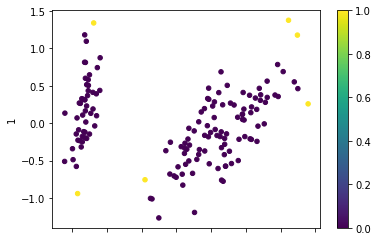

In [ ]:
# using sophisticated functions
from sklearn.neighbors import LocalOutlierFactor
f = LocalOutlierFactor()
detect = f.fit_predict(x)
outlier_idx2 = detect==-1
pd.crosstab(outlier_idx,outlier_idx2)
df_trans.plot.scatter(0,1,c=outlier_idx2,colormap='viridis')


# Missing Value Imputation 

In [ ]:
df = pd.read_csv('./MachineLearning_Day1/data11_khan2.csv')
xorg = df.values

# missing value detection
naidx = np.isnan(xorg)
naidx.sum()
naidx.sum(axis=0)
naidx.sum(axis=1)
xorg[naidx]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])

In [ ]:
df2=df.dropna

<bound method DataFrame.dropna of           V1        V2        V3  ...       V98       V99      V100
0   0.773344 -2.438405 -0.482562  ... -2.741090  0.200980 -2.338212
1  -0.078178 -2.415754  0.412772  ... -1.845793  0.617561 -2.289669
2  -0.084469 -1.649739 -0.241308  ... -1.240291 -0.418550 -2.132842
3   0.965614 -2.380547  0.625297  ... -1.348999  0.234914 -1.745258
4   0.075664 -1.728785  0.852626  ... -1.325764  1.000963 -0.833790
..       ...       ...       ...  ...       ...       ...       ...
58 -2.683846 -2.117767 -0.523236  ... -1.577455 -0.497909 -1.877317
59 -1.207646 -2.478130  0.094310  ... -1.697177 -0.977103 -2.126953
60 -1.684161 -2.053384  0.563835  ... -2.306593 -0.412188 -1.276185
61 -2.258568 -2.308603 -1.443076  ... -1.715354 -0.531198 -0.561768
62 -1.146333 -3.007805 -0.029326  ... -2.051826 -1.142251 -1.483246

[63 rows x 100 columns]>

simple missing value imputation

In [ ]:
# simple missing value imputation
from sklearn.impute import SimpleImputer

f = SimpleImputer(missing_values=np.nan,strategy='mean')
xfill = f.fit_transform(xorg)
np.isnan(xfill).sum().sum()
xfill[naidx]

f = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
xfill = f.fit_transform(xorg)
xfill[naidx]

In [ ]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data01_iris.csv')
df.head()
df.describe(include='all')
df['Species'].value_counts()

# visualization of pandas
df.hist('Sepal.Length')
df.boxplot('Sepal.Length')
df.plot.scatter('Sepal.Length','Sepal.Width')
SpeciesCode = df['Species'].astype('category').cat.codes
df.plot.scatter('Sepal.Length','Sepal.Width',c=SpeciesCode,colormap='viridis')


###########################################################
# Outlier Detection
###########################################################

# univariate outlier detection
# outlier check for each variable
df.boxplot('Sepal.Width')

# multivariate outlier detection
x = df.iloc[:,:-1].values
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(x)
center_matrix = km.cluster_centers_[km.labels_,:]
dist = ((x-center_matrix)**2).sum(axis=1)
np.sort(dist)
outlier_idx = dist>2.0

df.plot.scatter('Sepal.Length','Sepal.Width',c=outlier_idx,colormap='viridis')
df.plot.scatter('Petal.Length','Petal.Width',c=outlier_idx,colormap='viridis')
df.plot.scatter('Sepal.Length','Petal.Length',c=outlier_idx,colormap='viridis')

# pca
from sklearn.decomposition import PCA
pca = PCA()
xtrans = pca.fit_transform(x)
df_trans = pd.DataFrame(xtrans)
df_trans.plot.scatter(0,1,c=outlier_idx,colormap='viridis')

# using sophisticated functions
from sklearn.neighbors import LocalOutlierFactor
f = LocalOutlierFactor()
detect = f.fit_predict(x)
outlier_idx2 = detect==-1
pd.crosstab(outlier_idx,outlier_idx2)
df_trans.plot.scatter(0,1,c=outlier_idx2,colormap='viridis')


###########################################################
# Missing Value Imputation 
###########################################################

df = pd.read_csv('data11_khan2.csv')
xorg = df.values

# missing value detection
naidx = np.isnan(xorg)
naidx.sum()
naidx.sum(axis=0)
naidx.sum(axis=1)
xorg[naidx]

# simple missing value imputation
from sklearn.impute import SimpleImputer

f = SimpleImputer(missing_values=np.nan,strategy='mean')
xfill = f.fit_transform(xorg)
np.isnan(xfill).sum().sum()
xfill[naidx]

f = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
xfill = f.fit_transform(xorg)
xfill[naidx]

